In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics

In [96]:
car_dataset = pd.read_csv("car_data.csv")

In [98]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [100]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [102]:
#checking the number of rows and columns
car_dataset.shape   

(301, 9)

In [104]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [106]:
#checking the number of missing values.
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [108]:
#checking the number of missing values.
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [110]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [116]:
#encoding the "fuel" column 
car_dataset.replace({"Fuel_Type": {"Petrol": 0, "Diesel": 1}}, inplace = True)

#encoding the "seller_type" column
car_dataset.replace({"Seller_Type": {"Dealer": 0, "Individual": 1}}, inplace = True)

#encoding the "Transmission" column
car_dataset.replace({"Transmission": {"Manual": 0, "Automatic": 1}}, inplace = True)

In [118]:
car_dataset.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0


In [120]:
import datetime

In [122]:
datetime.datetime.now()

datetime.datetime(2024, 10, 29, 17, 52, 14, 458151)

In [124]:
date_time = datetime.datetime.now()

In [126]:
print(date_time)

2024-10-29 17:52:15.055381


In [128]:
car_dataset["Age"]  = date_time.year - car_dataset["Year"]

In [130]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,10
1,sx4,2013,4.75,9.54,43000,1,0,0,0,11
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,13
4,swift,2014,4.60,6.87,42450,1,0,0,0,10


In [132]:
car_dataset.drop("Year", axis = 1, inplace = True)

In [134]:
car_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [137]:
import seaborn as sns

<Axes: ylabel='Selling_Price'>

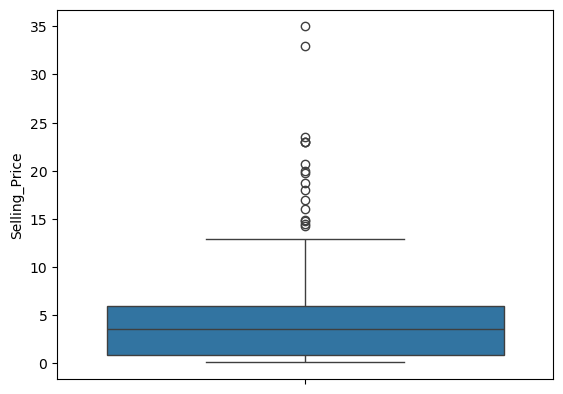

In [143]:
sns.boxplot(car_dataset["Selling_Price"])

In [145]:
sorted(car_dataset["Selling_Price"], reverse = True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [167]:
car_dataset[(car_dataset["Selling_Price"] >= 33.0) & (car_dataset["Selling_Price"] <= 35.0 )]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,1,0,1,0,7
86,land cruiser,35.0,92.60,78000,1,0,0,0,14


In [169]:
car_dataset.shape

(301, 9)

In [171]:
car_dataset["Fuel_Type"].unique()

array([0, 1, 'CNG'], dtype=object)

In [175]:
car_dataset["Fuel_Type"] = car_dataset["Fuel_Type"].map({"Petrol":0, "Diesel":1, "CNG":2})

In [177]:
car_dataset["Fuel_Type"].unique()

array([nan,  2.])

In [181]:
car_dataset["Seller_Type"] = car_dataset["Seller_Type"].map({"Dealer":0, "Individual":1})

In [183]:
car_dataset["Selling_Price"].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [ ]:
car_dataset["Transmission"] = car_dataset["Transmission"].map({"Manual":0, "Automatic":1})

In [185]:
car_dataset["Transmission"].unique()

array([0, 1], dtype=int64)

In [265]:
car_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,NaN,NaN,0,0,10
1,sx4,4.75,9.54,43000,NaN,NaN,0,0,11
2,ciaz,7.25,9.85,6900,NaN,NaN,0,0,7
3,wagon r,2.85,4.15,5200,NaN,NaN,0,0,13
4,swift,4.60,6.87,42450,NaN,NaN,0,0,10


In [ ]:
X = car_dataset.drop(["Car_Name", "Selling_Price"], axis = 1)
Y = car_dataset["Selling_price"]

In [277]:
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,NaN,NaN,0,0,10
1,9.54,43000,NaN,NaN,0,0,11
2,9.85,6900,NaN,NaN,0,0,7
3,4.15,5200,NaN,NaN,0,0,13
4,6.87,42450,NaN,NaN,0,0,10
...,...,...,...,...,...,...,...
296,11.60,33988,NaN,NaN,0,0,8
297,5.90,60000,NaN,NaN,0,0,9
298,11.00,87934,NaN,NaN,0,0,15
299,12.50,9000,NaN,NaN,0,0,7


In [279]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [139]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [273]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train, Y_train)

xg = XGBRegressor()
xg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [285]:
Y_pred1 = lr.predict(X_test)
Y_pred2 = rf.predict(X_test)
Y_pred3 = xgb.predict(X_test)
Y_pred4 = xg.predict(X_test)

In [287]:
from sklearn import metrics

In [295]:
score1 = metrics.r2_score(Y_test, Y_pred1)
score2 = metrics.r2_score(Y_test, Y_pred2)
score3 = metrics.r2_score(Y_test, Y_pred3)
score4 = metrics.r2_score(Y_test, Y_pred4)

In [297]:
print(score1, score2, score3, score4)

0.8156803447086172 0.9507619370875086 0.9587450650339611 0.943783711071984


In [303]:
final_data = pd.DataFrame({"Models": ["LR", "RF", "GBR", "XG"],
             "R2_SCORE": [score1, score2, score3, score4]})

In [305]:
final_data

,Models,R2_SCORE
0,LR,0.815680
1,RF,0.950762
2,GBR,0.958745
3,XG,0.943784


<Axes: xlabel='Models', ylabel='R2_SCORE'>

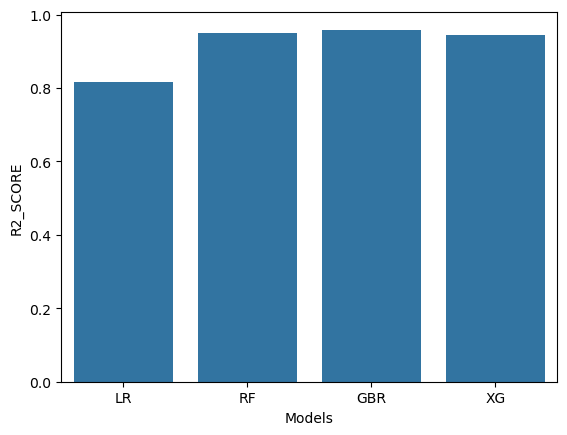

In [321]:
sns.barplot(x = "Models", y = "R2_SCORE", data = final_data)

In [323]:
xg = XGBRegressor()
xg_final = xg.fit(X,Y)

In [327]:
import joblib

In [329]:
joblib.dump(xg_final, "car_price_predictor")

['car_price_predictor']

In [331]:
model = joblib.load("car_price_predictor")

In [333]:
data_new = pd.DataFrame({
    "Present_Price":5.80,
    "Kms_Driven":27000,
    "Fuel_Type":0,
    "Seller_Type":0,
    "Transmission":0,
    "Owner":0,
    "Age":8
}, index = [0])

In [335]:
model.predict(data_new)

array([5.1298046], dtype=float32)